# Andria - SymSense MIT Challenge: Jupyter

This notebook checks your environment, sets a data path, and loads a small CSV to verify everything works.

In [1]:
import sys, os, platform
print("Python:", sys.version)
print("Platform:", platform.platform())
try:
    import numpy, pandas, sklearn
    print("NumPy:", numpy.__version__)
    print("pandas:", pandas.__version__)
    print("scikit-learn:", sklearn.__version__)
except Exception as e:
    print("Import error:", e)

Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]
Platform: macOS-15.6.1-arm64-arm-64bit-Mach-O
NumPy: 2.1.3
pandas: 2.2.3
scikit-learn: 1.6.1


## Configure data path
Set `SYMSENSE_DATA` environment variable to the shared dataset folder or use a local fallback.

In [2]:
import os
import pandas as pd

REPO_ROOT = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

DATA_ROOT = os.path.join(REPO_ROOT, "symsense-mit-challenge-2025-Jupyter-first", "data", "raw")

export_path = os.path.join(DATA_ROOT, "export.csv")

df = pd.read_csv(export_path)  

/var/folders/18/3l13t3mj3rq687w9xxnfj_sr0000gq/T/ipykernel_55309/3671063410.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(export_path)


## Data preprocessing
1. clean any missing or null values
identify and correct any outliers, remove duplicates, clean inconsistent symptom and dietary entires like typographical errors
2. convert date to month # only 
3. cut any conditions not in top frequent 100
4. cut any symptoms not in top frequent 100
5. cut any treatments not in top frequent 100
6. convert countries to US, not-US or other
7. filter out records with non reliable age paramters and convert age to 4 groups

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976223 entries, 0 to 7976222
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          object 
 1   age              float64
 2   sex              object 
 3   country          object 
 4   checkin_date     object 
 5   trackable_id     object 
 6   trackable_type   object 
 7   trackable_name   object 
 8   trackable_value  object 
dtypes: float64(1), object(8)
memory usage: 547.7+ MB


In [4]:
df.describe(include="all")

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
count,7976223,7.666997e+06,7844088,7678238,7976223,7976223,7976223,7976219,7049339
unique,42283,NaN,4,164,1675,264603,7,117214,15960
top,QEVuQwEAmS9U3RAfpAoxDeyaHuHfNQ==,NaN,female,US,2019-01-28,98,Symptom,humidity,0
freq,69187,NaN,6478402,4690209,10887,63126,3642279,232334,1385241
mean,NaN,3.506967e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.437926e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.966910e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# count duplicates
num_dupes = df.duplicated(subset=["user_id", "trackable_value"]).sum()
print("Number of duplicates:", num_dupes)

# show duplicate rows
duplicates = df[df.duplicated(subset=["user_id", "trackable_value"])]
display(duplicates)

Number of duplicates: 7203423


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
6,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,1356,Condition,Headache,2
8,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1
9,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3174,Condition,pain in joints on feet,2
10,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3175,Condition,neck and upper back pain,2
...,...,...,...,...,...,...,...,...,...
7976217,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,30924,Symptom,poor productivity,3
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN


count    7.666997e+06
mean     3.506967e+01
std      1.437926e+02
min     -1.966910e+05
25%      2.600000e+01
50%      3.400000e+01
75%      4.300000e+01
max      2.018000e+03
Name: age, dtype: float64


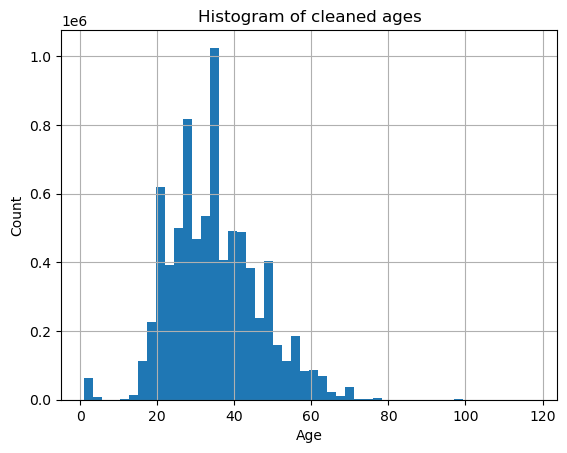

In [6]:
df.isnull().sum()

#HANDLING AGE
print(df['age'].describe())
#found invalid ages 
df.loc[df['age'] <= 0, 'age'] = pd.NA
df.loc[df['age'] > 120, 'age'] = pd.NA  

#filling in missing values 
df['age'] = df['age'].fillna(df['age'].median())

import matplotlib.pyplot as plt

df['age'].hist(bins=50)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of cleaned ages")
plt.show()

In [7]:
# fill in sex and country with unknown
df['sex'] = df['sex'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

# flagging missing values
df['trackable_value_missing'] = df['trackable_value'].isna().astype(int)

# verify it worked
df.head()

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,trackable_value_missing
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,34.0,Unknown,Unknown,2015-11-26,1069,Condition,Ulcerative colitis,0,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3,0
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4,0


In [8]:
df.isnull().sum()

user_id                         0
age                             0
sex                             0
country                         0
checkin_date                    0
trackable_id                    0
trackable_type                  0
trackable_name                  4
trackable_value            926884
trackable_value_missing         0
dtype: int64

In [9]:
print(df[df['trackable_name'].isna()])

#4 patient rows printed, 3 treatment names missing (no dose) and one tag 
#with missing values for name and value

                                  user_id   age     sex country checkin_date  \
1166156  QEVuQwEABia8sLJAdbmOw2SsxDTrlA==  37.0  female      DK   2017-12-26   
2791739  QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==  36.0  female      US   2018-09-10   
2947999  QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==  25.0   other      GB   2016-07-10   
6098747  QEVuQwEAUST6MIBr134hrc3rzrWLwg==  20.0  female      US   2019-09-29   

        trackable_id trackable_type trackable_name trackable_value  \
1166156        11185      Treatment            NaN         no dose   
2791739        11185      Treatment            NaN         no dose   
2947999         6627            Tag            NaN             NaN   
6098747        11185      Treatment            NaN         no dose   

         trackable_value_missing  
1166156                        0  
2791739                        0  
2947999                        1  
6098747                        0  


In [10]:
# check all 4 patients to see if NaN values are relevant or not

patient1 = df[df["user_id"] == "QEVuQwEAUST6MIBr134hrc3rzrWLwg=="]
display(patient1)
# random NaN value

patient2 = df[df["user_id"] == "QEVuQwEABia8sLJAdbmOw2SsxDTrlA=="]
display(patient2)
# no relevance so ok to be dropped

patient3 = df[df["user_id"] == "QEVuQwEAuB9JhT0x52qQo/zL8jAS4w=="]
display(patient3)
# same as above

patient4 = df[df["user_id"] == "QEVuQwEAqyEuXDs/JfR9Bghvktz4nA=="]
display(patient4)
# seems to be a typo/unnecessary NaN value because treatments already appear

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,trackable_value_missing
6098714,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,1281,Condition,Mania,1,0
6098715,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,76,Condition,Arthritis,1,0
6098716,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,1227,Condition,mood swings,2,0
6098717,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,2,Condition,ADHD,1,0
6098718,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,121,Condition,Bipolar disorder,1,0
6098719,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,909,Condition,Schizophrenia,1,0
6098720,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,1154,Condition,Eczema,2,0
6098721,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,891,Condition,Rosacea,2,0
6098722,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,745,Condition,Panic attacks,2,0
6098723,QEVuQwEAUST6MIBr134hrc3rzrWLwg==,20.0,female,US,2019-09-29,291,Condition,Depression,1,0


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,trackable_value_missing
1166145,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,397,Condition,Fibromyalgia,2,0
1166146,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,2316,Symptom,sharp head pain,0,0
1166147,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,345,Symptom,Long Term Memory,1,0
1166148,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,910,Symptom,Back stiffness,2,0
1166149,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,439,Symptom,over heating,0,0
1166150,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,2095,Symptom,Ear ringing,1,0
1166151,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,123,Symptom,Joint stiffness,2,0
1166152,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,2116,Symptom,Vision changes,0,0
1166153,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,230,Symptom,Vertigo,0,0
1166154,QEVuQwEABia8sLJAdbmOw2SsxDTrlA==,37.0,female,DK,2017-12-26,515,Symptom,exhaustion,3,0


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,trackable_value_missing
2791735,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,648,Condition,Microscopic colitis,3,0
2791736,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,152,Symptom,Nausea,1,0
2791737,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,197,Symptom,Stomach cramps,2,0
2791738,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,84,Symptom,Fatigue and tiredness,1,0
2791739,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,11185,Treatment,NaN,no dose,0
2791740,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,8838,Food,coffee,NaN,1
2791741,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,8839,Food,banana,NaN,1
2791742,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,9040,Food,pretzel,NaN,1
2791743,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,9100,Food,orange,NaN,1
2791744,QEVuQwEAuB9JhT0x52qQo/zL8jAS4w==,36.0,female,US,2018-09-10,8935,Food,water,NaN,1


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,trackable_value_missing
2947303,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2016-06-21,350,Condition,Ehlers-Danlos syndrome,3,0
2947304,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2016-06-21,1183,Condition,Myalgic encephalomyelitis,2,0
2947305,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2016-06-21,1191,Condition,Postural Orthostatic Tachycardia Syndrome,2,0
2947306,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2016-06-21,8,Symptom,Anxiety,1,0
2947307,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2016-06-21,403,Symptom,Acid Reflux,0,0
...,...,...,...,...,...,...,...,...,...,...
2948683,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2018-10-10,3707,Treatment,Florinef,0.1 mg,0
2948684,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2018-10-10,9506,Treatment,Vitamin b12,1000.0 mcg,0
2948685,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2018-10-10,9510,Treatment,Vitamin c (ascorbic acid),125mg,0
2948686,QEVuQwEAqyEuXDs/JfR9Bghvktz4nA==,25.0,other,GB,2018-10-10,10040,Treatment,Vitamin D3,2500 IU,0


In [11]:
# consensus that its okay to drop these values
df = df.dropna(subset=['trackable_name'])
df.isnull().sum()

user_id                         0
age                             0
sex                             0
country                         0
checkin_date                    0
trackable_id                    0
trackable_type                  0
trackable_name                  0
trackable_value            926883
trackable_value_missing         0
dtype: int64

In [12]:
# normalizing categorical columns
df = df.copy()

df['sex'] = df['sex'].str.strip().str.title()
df['country'] = df['country'].str.strip().str.upper()
df['trackable_name'] = df['trackable_name'].str.strip().str.lower()
df['trackable_type'] = df['trackable_type'].str.strip().str.lower()

df.head()

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,trackable_value_missing
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,34.0,Unknown,UNKNOWN,2015-11-26,1069,condition,ulcerative colitis,0,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,Male,US,2015-11-26,1069,condition,ulcerative colitis,0,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,Female,CA,2017-04-28,3168,condition,pain in left upper arm felt like i was getting...,4,0
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,Female,CA,2017-04-28,3169,condition,hip pain when gettin up,3,0
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,Female,CA,2017-04-28,3170,condition,pain in hand joints,4,0


In [13]:
df.isnull().sum()


user_id                         0
age                             0
sex                             0
country                         0
checkin_date                    0
trackable_id                    0
trackable_type                  0
trackable_name                  0
trackable_value            926883
trackable_value_missing         0
dtype: int64

Dataset cleaned!

In [14]:
# separating by data type
conditions = df[df["trackable_type"] == "condition"]
symptoms   = df[df["trackable_type"] == "symptom"]
foods      = df[df["trackable_type"] == "food"]
tags       = df[df["trackable_type"] == "tag"]

In [15]:
# FOOD - only list of foods eaten bc trackable values are all nAn
# filter only food rows with valid names
foods = df[df["trackable_type"].str.lower() == "food"].copy()
foods = foods[foods["trackable_name"].notna()]

# group by user and check-in data and aggregate foods into a list
foods_grouped = (
    foods.groupby(["user_id", "checkin_date"])["trackable_name"]
    .apply(list)
    .reset_index(name="foods_eaten")
)

# display to check
foods_grouped.head()

,user_id,checkin_date,foods_eaten
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[stuffed peppers, large coke]"
1,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-09,[chicken]
2,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-19,"[egg, strawberry, paprika, pita]"
3,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-20,"[spaghetti, coffee, donut, water, egg]"
4,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-21,"[coffee, cheese, strawberries, muesli, zucchin..."


In [16]:
# SYMPTOMS
# filter only symptom rows 
symptoms = df[df["trackable_type"].str.lower() == "symptom"].copy()
symptoms = symptoms[symptoms["trackable_name"].notna()]

# group by user and check-in date 
symptoms_grouped = (
    symptoms.groupby(["user_id", "checkin_date"], group_keys=False)[["trackable_name", "trackable_value"]]
    .apply(lambda x: list(zip(x["trackable_name"], x["trackable_value"])))
    .reset_index(name="symptoms_observed")
)

# display to check
symptoms_grouped.head()

,user_id,checkin_date,symptoms_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(tiredness, 4), (muscle ache, 4), (sore throa..."
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(hoarseness, 1), (diahrrea, 2), (sore throat,..."
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-01,"[(poop, 1), (gas, 4)]"
3,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-08,"[(rhinitis, 1), (dry eyes, 2), (hives, 2), (ea..."
4,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-09,"[(early waking, 1), (hives, 2), (dry eyes, 3),..."


In [17]:
# CONDITIONS
# filter only condition rows
conditions = df[df["trackable_type"].str.lower() == "condition"].copy()
conditions = conditions[conditions["trackable_name"].notna()]

# group by user and check-in date
conditions_grouped = (
    conditions.groupby(["user_id", "checkin_date"], group_keys=False)[["trackable_name", "trackable_value"]]
    .apply(lambda x: list(zip(x["trackable_name"], x["trackable_value"])))
    .reset_index(name="conditions_observed")
)

# display to check
conditions_grouped.head()

,user_id,checkin_date,conditions_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(graves' disease, 4)]"
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(graves' disease, 4)]"
2,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-09,"[(food allergies, 1)]"
3,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-16,"[(food allergies, 0)]"
4,QEVuQwEA++eIX7t8aiUY4OFw3DS5Yg==,2019-11-18,"[(meniere's disease, 4)]"


In [18]:
# TREATMENTS
# filter only treatment rows
treatments = df[df["trackable_type"].str.lower() == "treatment"].copy()
treatments = treatments[treatments["trackable_name"].notna()]

# group by user and check-in date
treatments_grouped = (
    treatments.groupby(["user_id", "checkin_date"], group_keys=False)[["trackable_name", "trackable_value"]]
    .apply(lambda x: list(zip(x["trackable_name"], x["trackable_value"])))
    .reset_index(name="treatments_observed")
)

# display to check
treatments_grouped.head()

,user_id,checkin_date,treatments_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(aleve, 2 x 220mg), (methimazole, 10 mg)]"
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(aleve, 2 x 220mg)]"
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-01,"[(aleve, 2 x 220mg)]"
3,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-06,"[(aleve, 2 x 220mg)]"
4,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-10,"[(aleve, 2 x 220mg)]"


In [19]:
# WEATHER 
# filter only weather rows
weather = df[df["trackable_type"].str.lower() == "weather"].copy()
weather = weather[weather["trackable_name"].notna()]

# group by user and check-in date
weather_grouped = (
    weather.groupby(["user_id", "checkin_date"], group_keys=False)[["trackable_name", "trackable_value"]]
    .apply(lambda x: list(zip(x["trackable_name"], x["trackable_value"])))
    .reset_index(name="weather_observed")
)

# display to check
weather_grouped.head()

,user_id,checkin_date,weather_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-25,"[(icon, partly-cloudy-day), (temperature_min, ..."
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-26,"[(icon, partly-cloudy-day), (temperature_min, ..."
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-27,"[(icon, partly-cloudy-day), (temperature_min, ..."
3,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(icon, rain), (temperature_min, 67.0), (tempe..."
4,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(icon, clear-day), (temperature_min, 64.0), (..."


In [20]:
# TAGS - only list of tags bc trackable values are all nAn
# filter only tag rows
tags = df[df["trackable_type"].str.lower() == "tag"].copy()
tags = tags[tags["trackable_name"].notna()]

# group by user and check-in date
tags_grouped = (
    tags.groupby(["user_id", "checkin_date"])["trackable_name"]
    .apply(list)
    .reset_index(name="tags_observed")
)

# display to check
tags_grouped.head()

,user_id,checkin_date,tags_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[tired, good sleep]"
1,QEVuQwEA++eIX7t8aiUY4OFw3DS5Yg==,2019-11-18,[stressed]
2,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-19,"[tired, stressed, not enough sleep, long day a..."
3,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-20,"[tired, relaxed, road trip]"
4,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-21,"[tired, ate breakfast, good sleep, dairy, woke..."


In [21]:
# HBI 
# filter only HBI rows
hbi = df[df["trackable_type"].str.lower() == "hbi"].copy()
hbi = hbi[hbi["trackable_name"].notna()]

# group by user and check-in date
hbi_grouped = (
    hbi.groupby(["user_id", "checkin_date"], group_keys=False)[["trackable_name", "trackable_value"]]
    .apply(lambda x: list(zip(x["trackable_name"], x["trackable_value"])))
    .reset_index(name="hbi_observed")
)

# display to check
hbi_grouped.head()

,user_id,checkin_date,hbi_observed
0,QEVuQwEA+47+KNebsMZxVzP77llQYQ==,2018-09-10,"[(hbi, 7)]"
1,QEVuQwEA+L6bweWf5MLOheHFIXSvag==,2017-04-08,"[(hbi, 0)]"
2,QEVuQwEA+NaRvJEwDkV5ZCei75moZw==,2018-03-12,"[(hbi, 10)]"
3,QEVuQwEA+wJyQ/FzPW7q0L3vLwG8MA==,2019-07-05,"[(hbi, 4)]"
4,QEVuQwEA//YQfwid8gnxliqJhtQ0Gw==,2018-09-30,"[(hbi, 6)]"


In [22]:
# SYMPTOMS
# filter only symptom rows 
symptoms = df[df["trackable_type"].str.lower() == "symptom"].copy()
symptoms = symptoms[symptoms["trackable_name"].notna()]

# group by user and check-in date 
symptoms_grouped = (
    symptoms.groupby(["user_id", "checkin_date"], group_keys=False)[["trackable_name", "trackable_value"]]
    .apply(lambda x: list(zip(x["trackable_name"], x["trackable_value"])))
    .reset_index(name="symptoms_observed")
)

# display to check
symptoms_grouped.head()

,user_id,checkin_date,symptoms_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(tiredness, 4), (muscle ache, 4), (sore throa..."
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(hoarseness, 1), (diahrrea, 2), (sore throat,..."
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-01,"[(poop, 1), (gas, 4)]"
3,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-08,"[(rhinitis, 1), (dry eyes, 2), (hives, 2), (ea..."
4,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-09,"[(early waking, 1), (hives, 2), (dry eyes, 3),..."


In [23]:
tables = {
    "food": foods_grouped,
    "symptoms": symptoms_grouped,
    "conditions": conditions_grouped,
    "treatments": treatments_grouped,
    "tags": tags_grouped,
    "weather": weather_grouped,
    "hbi": hbi_grouped
}

# checking summary stats
for name, tbl in tables.items():
    print(f"{name}: {tbl['user_id'].nunique()} users, {tbl['checkin_date'].nunique()} dates")

# checking for duplicates before making feature matrix
for name, tbl in tables.items():
    duplicates = tbl.duplicated(subset=["user_id", "checkin_date"]).sum()
    print(f"{name}: {duplicates} duplicate rows")

# parsing for any error
for name, tbl in tables.items():
    print(f"\n{name} head:")
    display(tbl.head())


food: 21144 users, 1076 dates
symptoms: 35894 users, 1669 dates
conditions: 38308 users, 1658 dates
treatments: 14251 users, 1659 dates
tags: 22224 users, 1658 dates
weather: 17820 users, 1160 dates
hbi: 140 users, 148 dates
food: 0 duplicate rows
symptoms: 0 duplicate rows
conditions: 0 duplicate rows
treatments: 0 duplicate rows
tags: 0 duplicate rows
weather: 0 duplicate rows
hbi: 0 duplicate rows

food head:


,user_id,checkin_date,foods_eaten
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[stuffed peppers, large coke]"
1,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-09,[chicken]
2,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-19,"[egg, strawberry, paprika, pita]"
3,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-20,"[spaghetti, coffee, donut, water, egg]"
4,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-21,"[coffee, cheese, strawberries, muesli, zucchin..."



symptoms head:


,user_id,checkin_date,symptoms_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(tiredness, 4), (muscle ache, 4), (sore throa..."
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(hoarseness, 1), (diahrrea, 2), (sore throat,..."
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-01,"[(poop, 1), (gas, 4)]"
3,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-08,"[(rhinitis, 1), (dry eyes, 2), (hives, 2), (ea..."
4,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-09,"[(early waking, 1), (hives, 2), (dry eyes, 3),..."



conditions head:


,user_id,checkin_date,conditions_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(graves' disease, 4)]"
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(graves' disease, 4)]"
2,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-09,"[(food allergies, 1)]"
3,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,2019-03-16,"[(food allergies, 0)]"
4,QEVuQwEA++eIX7t8aiUY4OFw3DS5Yg==,2019-11-18,"[(meniere's disease, 4)]"



treatments head:


,user_id,checkin_date,treatments_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(aleve, 2 x 220mg), (methimazole, 10 mg)]"
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(aleve, 2 x 220mg)]"
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-01,"[(aleve, 2 x 220mg)]"
3,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-06,"[(aleve, 2 x 220mg)]"
4,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-10,"[(aleve, 2 x 220mg)]"



tags head:


,user_id,checkin_date,tags_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[tired, good sleep]"
1,QEVuQwEA++eIX7t8aiUY4OFw3DS5Yg==,2019-11-18,[stressed]
2,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-19,"[tired, stressed, not enough sleep, long day a..."
3,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-20,"[tired, relaxed, road trip]"
4,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,2019-09-21,"[tired, ate breakfast, good sleep, dairy, woke..."



weather head:


,user_id,checkin_date,weather_observed
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-25,"[(icon, partly-cloudy-day), (temperature_min, ..."
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-26,"[(icon, partly-cloudy-day), (temperature_min, ..."
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-27,"[(icon, partly-cloudy-day), (temperature_min, ..."
3,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,"[(icon, rain), (temperature_min, 67.0), (tempe..."
4,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,"[(icon, clear-day), (temperature_min, 64.0), (..."



hbi head:


,user_id,checkin_date,hbi_observed
0,QEVuQwEA+47+KNebsMZxVzP77llQYQ==,2018-09-10,"[(hbi, 7)]"
1,QEVuQwEA+L6bweWf5MLOheHFIXSvag==,2017-04-08,"[(hbi, 0)]"
2,QEVuQwEA+NaRvJEwDkV5ZCei75moZw==,2018-03-12,"[(hbi, 10)]"
3,QEVuQwEA+wJyQ/FzPW7q0L3vLwG8MA==,2019-07-05,"[(hbi, 4)]"
4,QEVuQwEA//YQfwid8gnxliqJhtQ0Gw==,2018-09-30,"[(hbi, 6)]"


In [29]:
# separate by trackable type
conditions = df[df["trackable_type"].str.lower() == "condition"].copy()
symptoms   = df[df["trackable_type"].str.lower() == "symptom"].copy()
treatments = df[df["trackable_type"].str.lower() == "treatment"].copy()
foods      = df[df["trackable_type"].str.lower() == "food"].copy()
tags       = df[df["trackable_type"].str.lower() == "tag"].copy()

# convert trackable_value to numeric
for table in [symptoms, conditions, treatments]:
    table["trackable_value"] = pd.to_numeric(table["trackable_value"], errors="coerce")

##
# VERSION 1 - feature matrix aggregated by USER 
##
# demographics per user
demographics = df.groupby("user_id").agg({
    "age": "median",
    "sex": "first",
    "country": "first"
}).reset_index()

# food presence flag
food_flag = (
    foods.groupby("user_id")
    .size()
    .gt(0)            
    .astype(int)      
    .reset_index(name="ate_food")
)

# symptoms summary
symptom_summary = (
    symptoms.groupby("user_id")
    .agg(
        num_symptoms=("trackable_name", "nunique"),
        avg_symptom_value=("trackable_value", "mean"),
        max_symptom_value=("trackable_value", "max")
    )
    .reset_index()
)

# conditions summary
condition_summary = (
    conditions.groupby("user_id")
    .agg(
        num_conditions=("trackable_name", "nunique"),
        avg_condition_value=("trackable_value", "mean"),
        max_condition_value=("trackable_value", "max")
    )
    .reset_index()
)

# treatments summary
treatment_summary = (
    treatments.groupby("user_id")
    .agg(
        num_treatment_days=("checkin_date", "nunique"),
        num_unique_treatments=("trackable_name", "nunique")
    )
    .reset_index()
)

# tags summary
tag_summary = (
    tags.groupby("user_id")
    .agg(
        num_tag_days=("checkin_date", "nunique"),
        num_unique_tags=("trackable_name", "nunique")
    )
    .reset_index()
)

# merge all features
feature_matrix_user = (
    demographics
    .merge(food_flag, on="user_id", how="left")
    .merge(symptom_summary, on="user_id", how="left")
    .merge(condition_summary, on="user_id", how="left")
    .merge(treatment_summary, on="user_id", how="left")
    .merge(tag_summary, on="user_id", how="left")
).fillna(0)

##
# VERSION 2 - feature matrix aggregated by USER and CHECKIN DATE
#

# demographics per user
demo_cols = ["user_id", "age", "sex", "country"]

# symptoms summary per user per data
symptom_daily = (
    symptoms.groupby(["user_id", "checkin_date"])
    .agg(
        num_symptoms=("trackable_name", "nunique"),
        avg_symptom_value=("trackable_value", "mean"),
        max_symptom_value=("trackable_name", "max")
    )
    .reset_index()
)

# conditions summary per user per data
condition_daily = (
    conditions.groupby(["user_id", "checkin_date"])
    .agg(
        num_conditions=("trackable_name", "nunique"),
        avg_condition_value=("trackable_value", "mean"),
        max_condition_value=("trackable_value", "max")
    )
    .reset_index()
)

# treatments summary per user per data
treatment_daily = (
    treatments.groupby(["user_id", "checkin_date"])
    .agg(
        num_unique_treatments=("trackable_name", "nunique")
    )
    .reset_index()
)

# tags summary
tag_daily = (
    tags.groupby(["user_id", "checkin_date"])
    .agg(
        num_unique_tags=("trackable_name", "nunique")
    )
    .reset_index()
)

# food summary
food_daily = (
    foods.groupby(["user_id", "checkin_date"])
    .size()
    .gt(0)            
    .astype(int)     
    .reset_index(name="ate_food")
)

# merge all features
feature_matrix_date = (
    symptom_daily
    .merge(condition_daily, on=["user_id", "checkin_date"], how="outer")
    .merge(treatment_daily, on=["user_id", "checkin_date"], how="outer")
    .merge(tag_daily, on=["user_id", "checkin_date"], how="outer")
    .merge(food_daily, on=["user_id", "checkin_date"], how="outer")
    .merge(demographics[demo_cols], on="user_id", how="left")
).fillna(0)

# lower case and strip
conditions["trackable_name_clean"] = conditions["trackable_name"].str.strip().str.lower()

# list of autoimmune conditions 
autoimmune_conditions = ["ulcerative colitis", "rheumatoid arthritis", "lupus"]

# initializing columns
for cond in autoimmune_conditions:
    patients_with_cond = conditions.loc[
        conditions["trackable_name_clean"] == cond, "user_id"
    ].unique()
    feature_matrix_user[cond] = feature_matrix_user["user_id"].isin(patients_with_cond).astype(int)
    feature_matrix_date[cond] = feature_matrix_date["user_id"].isin(patients_with_cond).astype(int)

feature_matrix_user["autoimmune_label"] = feature_matrix_user[autoimmune_conditions].max(axis=1).astype(int)
feature_matrix_date["autoimmune_label"] = feature_matrix_date[autoimmune_conditions].max(axis=1).astype(int)

user_cols = (
    ["user_id"] + 
    ["age", "sex", "country"] + 
    ["num_conditions", "avg_condition_value", "max_condition_value"] +
    ["num_symptoms", "avg_symptom_value", "max_symptom_value"] +
    ["num_treatment_days", "num_unique_treatments"] +
    ["ate_food"] +
    ["num_tag_days", "num_unique_tags"] +
    ["autoimmune_label"] +
    autoimmune_conditions
)
user_cols = [col for col in user_cols if col in feature_matrix_user.columns]
feature_matrix_user = feature_matrix_user[user_cols]

date_cols = (
    ["user_id", "checkin_date"] +
    ["age", "sex", "country"] +
    ["num_conditions", "avg_condition_value", "max_condition_value"] +
    ["num_symptoms", "avg_symptom_value", "max_symptom_value"] +
    ["num_unique_treatments"] +
    ["ate_food"] +
    ["num_unique_tags"] +
    ["autoimmune_label"] +
    autoimmune_conditions 
)
date_cols = [col for col in date_cols if col in feature_matrix_date.columns]
feature_matrix_date = feature_matrix_date[date_cols]

display(feature_matrix_user.head())
display(feature_matrix_date.head())

,user_id,age,sex,country,num_conditions,avg_condition_value,max_condition_value,num_symptoms,avg_symptom_value,max_symptom_value,num_treatment_days,num_unique_treatments,ate_food,num_tag_days,num_unique_tags,autoimmune_label,ulcerative colitis,rheumatoid arthritis,lupus
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,Female,US,1.0,4.000000,4.0,7.0,2.692308,4.0,11.0,2.0,1.0,1.0,2.0,0,0,0,0
1,QEVuQwEA++PmSIrPm0/GE+l1QxEh1g==,35.0,Female,SG,1.0,0.500000,1.0,4.0,1.666667,3.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0
2,QEVuQwEA++a0wFdkPDsX3an0gj7i0g==,32.0,Female,US,0.0,0.000000,0.0,4.0,2.750000,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,QEVuQwEA++eIX7t8aiUY4OFw3DS5Yg==,26.0,Female,US,1.0,4.000000,4.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0
4,QEVuQwEA++pbRBEAssUx/BQ4GSxBbQ==,39.0,Female,US,3.0,0.666667,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


,user_id,checkin_date,age,sex,country,num_conditions,avg_condition_value,max_condition_value,num_symptoms,avg_symptom_value,max_symptom_value,num_unique_treatments,ate_food,num_unique_tags,autoimmune_label,ulcerative colitis,rheumatoid arthritis,lupus
0,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-28,42.0,Female,US,1.0,4.0,4.0,4.0,3.750000,tiredness,2.0,1.0,2.0,0,0,0,0
1,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-08-29,42.0,Female,US,1.0,4.0,4.0,7.0,2.142857,tiredness,1.0,0.0,0.0,0,0,0,0
2,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-01,42.0,Female,US,0.0,0.0,0.0,2.0,2.500000,poop,1.0,0.0,0.0,0,0,0,0
3,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-06,42.0,Female,US,0.0,0.0,0.0,0.0,0.000000,0,1.0,0.0,0.0,0,0,0,0
4,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,2019-09-10,42.0,Female,US,0.0,0.0,0.0,0.0,0.000000,0,1.0,0.0,0.0,0,0,0,0


In [30]:
base_path = "/Users/Andria/Desktop/symsense-mit-challenge-2025-Jupyter-first/data/processed/flaredown"
os.makedirs(base_path, exist_ok=True)

feature_matrix_user.to_csv(f"{base_path}/feature_matrix_user.csv", index=False)
feature_matrix_date.to_csv(f"{base_path}/feature_matrix_date.csv", index=False)
foods_grouped.to_csv(f"{base_path}/foods_grouped.csv", index=False)
symptoms_grouped.to_csv(f"{base_path}/symptoms_grouped.csv", index=False)
conditions_grouped.to_csv(f"{base_path}/conditions_grouped.csv", index=False)
treatments_grouped.to_csv(f"{base_path}/treatments_grouped.csv", index=False)
tags_grouped.to_csv(f"{base_path}/tags_grouped.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split

X = feature_matrix.drop(
    columns=["user_id", "autoimmune_label",
             "ulcerative colitis", "rheumatoid arthritis", "lupus"]
)

y = feature_matrix["autoimmune_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ["sex","country"]
ct = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder="passthrough")

X_train_enc = ct.fit_transform(X_train)
X_test_enc = ct.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_enc, y_train)

y_pred = clf.predict(X_test_enc)
y_prob = clf.predict_proba(X_test_enc)[:,1]

from sklearn.metrics import roc_auc_score, f1_score
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))


AUC-ROC: 0.6020606340537504
F1 Score: 0.003552397868561279
